In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Analyzing DataSet

In [40]:
file = pd.read_csv("https://raw.githubusercontent.com/ta-verma/DataSets/master/people.txt",delimiter=",")
print(file.index)


RangeIndex(start=0, stop=5, step=1)


In [41]:
print(len(file))

5


In [42]:
print(file.head())

   age agegroup  height   status  yearsmarried
0   21    adult     6.0   single            -1
1    2    child     3.0  married             0
2   18    adult     5.7  married            20
3  221  elderly     5.0  widowed             2
4   34    child    -7.0  married             3


In [43]:
file.dtypes

age               int64
agegroup         object
height          float64
status           object
yearsmarried      int64
dtype: object

In [44]:
file.count()

age             5
agegroup        5
height          5
status          5
yearsmarried    5
dtype: int64

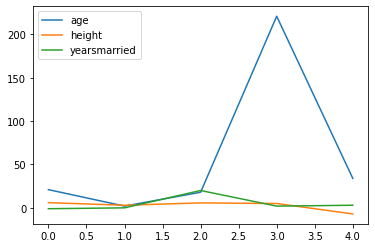

In [45]:
file.plot()

##Rules

###Age Rule

In [0]:
def age_rule(fil):
  return fil["age"].isin(range(151))

In [47]:
#violations
v1= age_rule(file)
print(v1)

0     True
1     True
2     True
3    False
4     True
Name: age, dtype: bool


###YearsMarried Rule

In [0]:
def yearsmarried_rule(fil):
  return fil["yearsmarried"]<file["age"]

In [49]:
#violations
v2 = yearsmarried_rule(file)
print(v2)

0     True
1     True
2    False
3     True
4     True
dtype: bool


In [50]:
type(yearsmarried_rule(file))

pandas.core.series.Series

###Group Rule

In [0]:
def group_rule(x):
  temp = []
  for i in x.index:
    if (x["age"][i] in range(18) and x["agegroup"][i] == "child") or (x["age"][i] in range(18, 66) and x["agegroup"][i] == "adult") or (x["age"][i] > 65 and x["agegroup"][i] == "elderly"):
      temp.append(True)
    else:
      temp.append(False)
  
  return pd.Series(temp)

In [0]:
v3 = group_rule(file)

###Realtionship Rule

In [0]:
def status_rule(x):
  temp = []
  for i in x.index:
    if (x["status"][i]=="married" or x["status"][i]=="single" or x["status"][i]=="widowed"):
      temp.append(True)
    else:
      temp.append(False)
  
  return pd.Series(temp)

In [54]:
#violation
v4 = status_rule(file)
print(v4)

0    True
1    True
2    True
3    True
4    True
dtype: bool


##Summarized Rules

In [55]:
print("Summarized result :\n")
print("Total People :",len(file))
print("No of people violated status rule",status_rule(file).to_list().count(False))
print("No of people violated age rule :",age_rule(file).to_list().count(False))
print("No of people violated yearsmarried rule :",yearsmarried_rule(file).to_list().count(False))
print("No of people violated age group rule :",group_rule(file).to_list().count(False))


Summarized result :

Total People : 5
No of people violated status rule 0
No of people violated age rule : 1
No of people violated yearsmarried rule : 1
No of people violated age group rule : 1


##Visualization

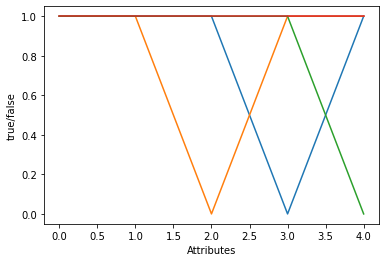

In [56]:
plt.plot(age_rule(file))
plt.plot(yearsmarried_rule(file))
plt.plot(group_rule(file))
plt.plot(v4)
plt.xlabel('Attributes')
plt.ylabel("true/false")
plt.show()

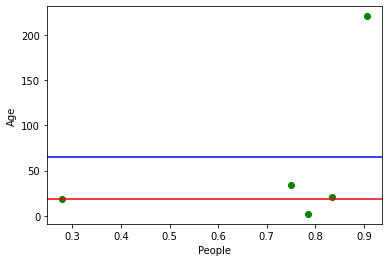

In [57]:
##Age scatter plot
plt.axhline(y=18, color='r', linestyle='-')
plt.axhline(y=65,color='b',linestyle='-')
plt.scatter(np.random.rand(5),file["age"],color='g')
plt.ylabel("Age")
plt.xlabel('People')
plt.show()

[[ True  True  True  True]
 [ True  True  True  True]
 [ True False  True  True]
 [False  True  True  True]
 [ True  True False  True]]


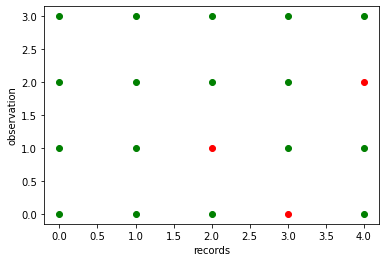

In [58]:
#violations
plot=pd.concat([v1, v2,v3,v4], axis=1)
pl=plot.to_numpy()
print(pl)
import matplotlib.pyplot as plt
for i in range(5):
    for j in range(4):
        if(pl[i,j]):
            plt.scatter(i,j,color='g')
        else:
            plt.scatter(i,j,color='r')


plt.xlabel('records')
plt.ylabel('observation')
plt.show()
